# Fourier Transform

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
from IPython import display
from matplotlib import animation

style.use('ggplot')

# %matplotlib inline

## Euler's formula

$e^{\pi i} = -1$

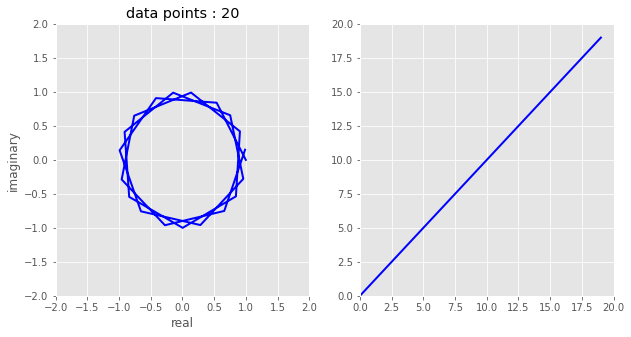

In [11]:
N = 20
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.set_xlim((-2, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel("real")
ax1.set_ylabel("imaginary")

ax2.set_xlim((0,N))            
ax2.set_ylim((0,N))


txt_title = ax1.set_title('data points : 0')
plot1, = ax1.plot([], [], 'b-', lw=2)
plot2, = ax2.plot([], [], 'b-', lw=2)

def draw_frame(n):
    a = np.arange(n+1)
    data = np.exp(1j * a)
    plot1.set_data(data.real,data.imag)
    plot2.set_data(range(n+1),a)
    txt_title.set_text(f"data points : {n+1}")
    return (plot1,)

anim = animation.FuncAnimation(fig, draw_frame, frames=N, interval=1000, blit=True)

display.HTML(anim.to_html5_video())

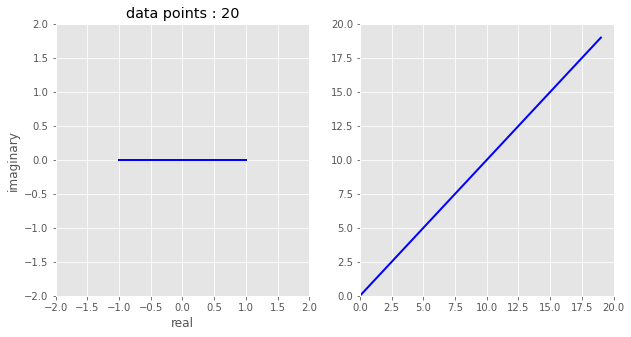

In [10]:
N = 20
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.set_xlim((-2, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel("real")
ax1.set_ylabel("imaginary")

ax2.set_xlim((0,N))            
ax2.set_ylim((0,N))


txt_title = ax1.set_title('data points : 0')
plot1, = ax1.plot([], [], 'b-', lw=2)
plot2, = ax2.plot([], [], 'b-', lw=2)

def draw_frame(n):
    a = np.arange(n+1)
    data = np.exp(1j * np.pi * a)
    plot1.set_data(data.real,data.imag)
    plot2.set_data(range(n+1),a)
    txt_title.set_text(f"data points : {n+1}")
    return (plot1,)

anim = animation.FuncAnimation(fig, draw_frame, frames=N, interval=1000, blit=True)

display.HTML(anim.to_html5_video())

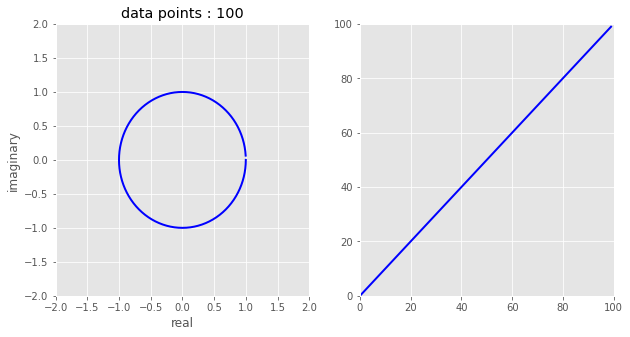

In [3]:
N = 100
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.set_xlim((-2, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel("real")
ax1.set_ylabel("imaginary")

ax2.set_xlim((0,N))            
ax2.set_ylim((0,N))


txt_title = ax1.set_title('data points : 0')
plot1, = ax1.plot([], [], 'b-', lw=2)
plot2, = ax2.plot([], [], 'b-', lw=2)

def draw_frame(n):
    a = np.arange(n+1)
    data = np.exp(-2j * np.pi * a/N)
    plot1.set_data(data.real,data.imag)
    plot2.set_data(range(n+1),a)
    txt_title.set_text(f"data points : {n+1}")
    return (plot1,)

anim = animation.FuncAnimation(fig, draw_frame, frames=N, interval=100, blit=True)

display.HTML(anim.to_html5_video())

## Sine wave


$A_{shift} + A \sin(2{\pi}{f}{t} + \phi )$

A = Amplitude\
$A_{shift}$ = Amplitude Shift\
f = frequency\
t = time\
$\phi$ = phase shift


In [4]:

def sine_wave_gen(n_cycles, sampling, freq , start = 0, end = 10, amplitude = 1, amp_shift = 0, phase_shift = 0):
    
    # freq = 1
    # n_cycles = 10
    # sampling = 30
    
    interval = 1 / (sampling * freq)
    
    time = np.arange(start, end, interval)
    
    wave = amp_shift + amplitude * np.sin( 2 * np.pi * freq * time + phase_shift)
    
    return wave, time

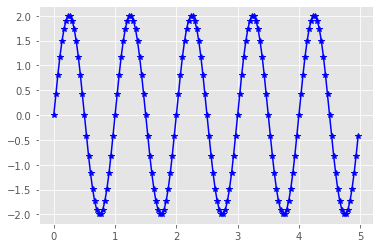

In [5]:
wave, time = sine_wave_gen(n_cycles = 30, sampling = 30 , freq = 1, start = 0, end = 5, amplitude = 2)
plt.plot(time,wave,'b-*')

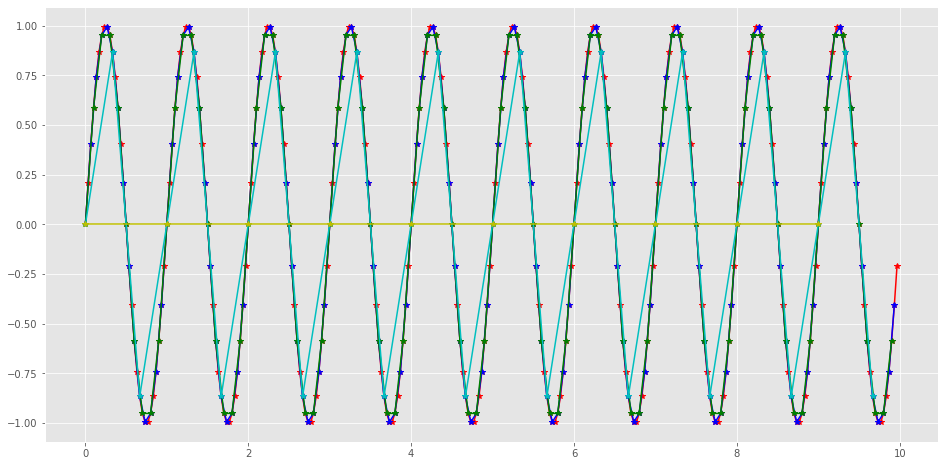

In [6]:

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)


wave, time = sine_wave_gen(n_cycles = 30, sampling = 30 , freq = 1)
ax.plot(time, wave, 'r-*')

wave, time = sine_wave_gen(n_cycles = 30, sampling = 15 , freq = 1)
ax.plot(time, wave, 'b-*')

wave, time = sine_wave_gen(n_cycles = 30, sampling = 10 , freq = 1)
ax.plot(time, wave, 'g-*')


wave, time = sine_wave_gen(n_cycles = 30, sampling = 3 , freq = 1)
ax.plot(time, wave, 'c-*')

wave, time = sine_wave_gen(n_cycles = 30, sampling = 1, freq = 1)
ax.plot(time, wave, 'y-*')

plt.show()

## Sine Wave Animation

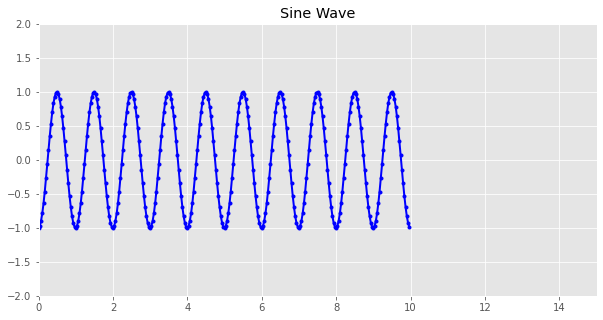

In [7]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,(1,2))

ax1.set_xlim(( 0, 15))            
ax1.set_ylim((-2, 2))

txt_title = ax1.set_title('Sine Wave')
plot1, = ax1.plot([], [], 'b.-', lw=2)

n_cycles = 20
freq = 1
sampling = 30

def draw_frame(n):
    
    wave, time = sine_wave_gen(n_cycles, sampling, freq, phase_shift=n)
    plot1.set_data(time,wave)
    return (plot1,)

anim = animation.FuncAnimation(fig, draw_frame, frames=100, interval=100, blit=True)

display.HTML(anim.to_html5_video())

## Discrete Fourier Transform 

$X_{k} = \sum_{n=0}^{N-1} x_n e^{-{i}{2}{\pi}{k}\frac{n}{N}}$

In [8]:
def freq_plane(x,k,N):
    return x * np.exp(-1j *2 * np.pi * k * (np.arange(N)/N))

def freq_transform_old(x):
    N = x.shape[0]
    values = []
    for k in range(N):
        X_k = (freq_plane(x,k,N)).sum()
        values.append(X_k)

    X = np.array(values)
    return X

but this is not optimized way to calculate. 

I learnt this new method to use matrix multiplication and broadcasting in machine learning gradient descent calculation

expanding the submission.. and looking for patterns to multiply

$X_0 = e^\frac{i2\pi}{N}[ x_0 e^{0.0} + x_1 e^{0.1} + \dots + x_{N-1} e^{0.N-1} ]\\
X_1 = e^\frac{i2\pi}{N}[ x_0 e^{1.0} + x_1 e^{1.1} + \dots + x_{N-1} e^{1.N-1} ]\\
\dots \\
X_{N-1} = e^\frac{i2\pi}{N}[ x_0 e^{{N-1}.0} + x_1 e^{{N-1}.1} + ... + x_{N-1} e^{{N-1}{N-1}} ]$

Transforming in matrix 

$\begin{bmatrix}
    X_{0} &      
    X_{1} \dots &      
    X_{N-1}      
\end{bmatrix}
= 
\begin{bmatrix}
    x_{0} &      
    x_{1} \dots &      
    x_{N-1}      
\end{bmatrix} * 
e^{\frac{i2\pi}{N}} 
\begin{bmatrix}
    e^{0.0} & e^{0.1} & e^{0.2} & \dots & e^{0.N-1} \\
    e^{1.0} & e^{1.1} & e^{1.2} & \dots & e^{1.N-1} \\
    \dots \\
    e^{N-1.0} & e^{N-1.1} & e^{N-1.2} & \dots & e^{N-1.N-1}
\end{bmatrix}$

Preparing k*n

$k=
\begin{bmatrix}
    k_0 \\
    k_1 \\
    k_2 \\
    \dots \\
    k_N-1
\end{bmatrix} \\
n= 
\begin{bmatrix}
    n_0 & n_1 & n_2 & \dots & n_N-1 
\end{bmatrix} \\
\\
Broadcasting \\
\\
k * n = \begin{bmatrix}
    k_0.n_0 & k_0.n_1 & \dots & k_0.n_{N-1} \\
    k_1.n_0 & k_1.n_1 & \dots & k_1.n_{N-1} \\
    \dots \\
    k_{N-1}.n_0 & k_{N-1}.n_1 & \dots & k_{N-1}.n_{N-1} \\
\end{bmatrix}$

In [9]:
def freq_transform(x):
    """
    
    Notes:
        This is faster and optimized approach.
        using numpy matrix multiplication here.
    """
    
    N = x.shape[0]
    n = np.arange(N) # an array of size N-1
    k = n.reshape(-1,1) # freq idxs with (N-1,1)
    
    
    # with numpy broadcasting
    # k (N-1,1) is broadcasted over n (N-1,) and result is 
    m_value = np.exp(-2 * np.pi * k * (n/N) * 1j) 
    # (N-1,N-1)
    
    X = x @ m_value # (N-1,N-1) = (N-1,1) 
    
    return X
    

### Winding plane

here we are using an iterative approach to do the transform. because we want each plane for ever frequency to visualize

In [10]:
n_cycles = 10
freq = 1
samples_per_cycle = 50
sine_wave, time = sine_wave_gen(n_cycles, sampling, freq)

In [11]:
N = sine_wave.shape[0]

In [12]:
values = []
for k in range(N):
    X = (sine_wave * np.exp(-2 * np.pi * k * (np.arange(N)/N) * 1j)).sum()
    values.append(X)
    
values = np.array(values)

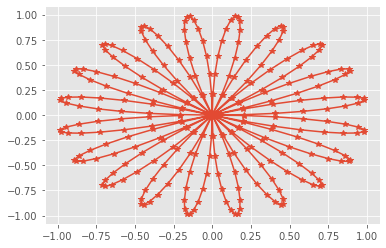

In [13]:
plane = freq_plane(sine_wave,1,sine_wave.shape[0])
plt.plot(plane.real,plane.imag,marker='*')
plt.show()

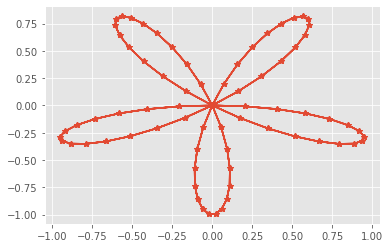

In [14]:
plane = freq_plane(sine_wave,2,sine_wave.shape[0])
plt.plot(plane.real,plane.imag,marker='*')
plt.show()

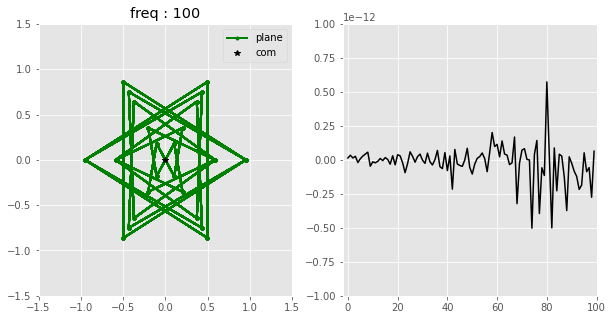

In [15]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.set_xlim((-1.5, 1.5))            
ax1.set_ylim((-1.5, 1.5))

ax2.set_xlim((-2, 100))            
ax2.set_ylim((-1e-12, 1e-12))

txt_title = ax1.set_title('Winding plane')
plot1, = ax1.plot([], [], 'g.-', lw=2, label='plane')
plot2, = ax1.plot([], [], 'k*', label='com')

plot3, = ax2.plot([], [], 'k-')

ax1.legend()

n_cycles = 10
freq = 1
samples_per_cycle = 100

l_com = []
i_com = []

sine_wave, time = sine_wave_gen(n_cycles, sampling, freq)
N = sine_wave.shape[0]
def draw_frame(n):
    plane = freq_plane(sine_wave,n+1,N)
    plot1.set_data(plane.real,plane.imag)
    
    com = plane.sum()
    plot2.set_data(com.real,com.imag)
    
    l_com.append(com.real)
    i_com.append(n)
    
    plot3.set_data(i_com,l_com)
    txt_title.set_text(f"freq : {n+1}")
    return (plot1,plot2,plot3)

anim = animation.FuncAnimation(fig, draw_frame, frames=100, interval=1000, blit=True)

display.HTML(anim.to_html5_video())

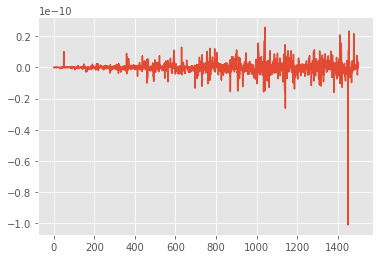

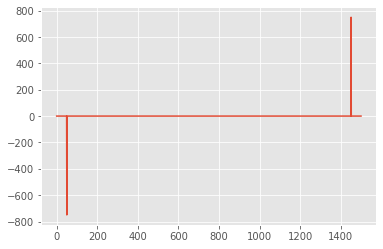

In [16]:
n_cycles = 10
freq = 5
samples_per_cycle = 100
sine_wave, time = sine_wave_gen(n_cycles, sampling, freq)

fft_value = freq_transform(sine_wave)

plt.plot(fft_value.real)
plt.show()

plt.plot(fft_value.imag)
plt.show()


In [17]:
%timeit freq_transform(sine_wave)

470 ms ± 97.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit np.fft.fft(sine_wave)

60 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Symmetries in DFT

$X_{k} = \sum_{n=0}^{N-1} x_n e^{-{i}{2}{\pi}{k}\frac{n}{N}}\\
X_{N+k} = \sum_{n=0}^{N-1} x_n e^{-{i}{2}{\pi}{(N+k)}\frac{n}{N}}\\
X_{N+k} = \sum_{n=0}^{N-1} x_n e^{-{i}{2}{\pi}{N}} e^{-{i}{2}{\pi}{k}\frac{n}{N}}\\
e^{-{i}{2}{\pi}{N}} = 1\\
X_{N+k} = \sum_{n=0}^{N-1} x_n e^{-{i}{2}{\pi}{k}\frac{n}{N}}\\
X_{N+k} = X_k\\
X_{k + i.N} = X_k$

Cooley and Tukey used exactly this approach in deriving the Fast Fourier Transform.

## Fast Fourier Transform

`concept for odd and even numbers`\
even numbers = $2m$ where $m\in[0,\infty]$\
odd numbers  = $2m + 1$ where $m\in[0,\infty]$

$X_{k} = \sum_{n=0}^{N-1} x_n e^{-{i}{2}{\pi}{k}\frac{n}{N}}\\
X_{k} = \sum_{m=0}^{(N/2)-1} x_{2m} e^{-{i}{2}{\pi}{k}\frac{2m}{N}} + \sum_{m=0}^{(N/2)-1} x_{2m+1} e^{-{i}{2}{\pi}{k}\frac{2m+1}{N}}\\
X_{k} = \sum_{m=0}^{(N/2)-1} x_{2m} e^{-{i}{2}{\pi}{k}\frac{2m}{N}} + e^{-{i}{2}{\pi}{\frac{k}{N}}} \sum_{m=0}^{(N/2)-1} x_{2m+1} e^{-{i}{2}{\pi}{k}\frac{2m}{N}}\\
X_{k} = \sum_{m=0}^{(N/2)-1} x_{2m} e^{-{i}{2}{\pi}{k}\frac{m}{N/2}} + e^{-{i}{2}{\pi}{\frac{k}{N}}} \sum_{m=0}^{(N/2)-1} x_{2m+1} e^{-{i}{2}{\pi}{k}\frac{m}{N/2}}$

### FFT algorithm
![FFT_algo](./images/dft_fft_algo.png)

In [19]:
np.array([0,1,2,3,4,5])[::2] # numpy selecting even indices

array([0, 2, 4])

In [20]:
np.array([0,1,2,3,4,5])[1::2] # numpy selecting odd indices

array([1, 3, 5])

In [21]:
np.concatenate(
    [
        np.array([0,1,2,3,4,5])[::2],
        np.array([0,1,2,3,4,5])[1::2]
    ]
)

array([0, 2, 4, 1, 3, 5])

In [22]:
n_cycles = 10
freq = 1
sampling = 1024
sine_wave, time = sine_wave_gen(n_cycles, sampling, freq, end=8)
len(sine_wave)

8192

In [23]:
#TODO

## Inverse Frequency Fourier Transform

$x_{k} = \frac{1}{N}\sum_{n=0}^{N-1} X_n e^{{i}{2}{\pi}{k}\frac{n}{N}}$

In [ ]:
def inv_freq_transform(x):
    N = x.shape[0]

    inv_values = []

    for k in range(N):
        X = (x * np.exp(2 * np.pi * k * (np.arange(N)/N) * 1j)).sum() / N
        inv_values.append(X)

    inv_values = np.array(inv_values)
    
    return inv_values.real

In [ ]:
n_cycles = 15
freq = 2
samples_per_cycle = 100
sine_wave, time = sine_wave_gen(n_cycles, sampling, freq)

plt.plot(sine_wave)

In [ ]:
values = freq_transform(sine_wave)

plt.plot(values.real)

In [ ]:
inv_values = inv_freq_transform(values)

plt.plot(inv_values,'y*-')
plt.plot(sine_wave,'b.-')